# Football Match Analysis

## Importing Python Libraries

In [256]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing SQLite Data

### Create DB connection

In [257]:
cnx = sqlite3.connect('../data/database.sqlite')

### Store *Match* Table into ```match_df``` variable

In [258]:
match_df = pd.read_sql_query("SELECT * FROM Match", cnx)

In [259]:
player_df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [260]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [261]:
player_df.sort_values("overall_rating", ascending=False)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
102483,102484,158023,30981,2015-10-16 00:00:00,94.0,94.0,left,medium,low,80.0,...,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
102482,102483,158023,30981,2015-12-17 00:00:00,94.0,94.0,left,medium,low,80.0,...,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
102491,102492,158023,30981,2014-04-25 00:00:00,94.0,97.0,left,medium,low,84.0,...,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102492,102493,158023,30981,2013-11-15 00:00:00,94.0,97.0,left,high,medium,84.0,...,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102494,102495,158023,30981,2013-03-22 00:00:00,94.0,97.0,left,high,medium,84.0,...,90.0,78.0,13.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182587,182588,116368,25538,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183249,183250,139865,32633,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183309,183310,141272,33823,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183361,183362,168650,25772,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
player_df = player_df.sort_values("date", ascending=False).drop_duplicates("player_api_id").sort_values("overall_rating", ascending=False)

In [263]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [264]:
match_df.shape

(25979, 115)

In [265]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [266]:
match_df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


## Data Cleaning

In [267]:
match_df_nona = match_df.dropna()

In [268]:
match_df_nona.shape

(1762, 115)

In [269]:
match_df.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
id,1.000000,0.994503,0.994503,0.003970,0.134517,-0.016055,-0.016071,0.008577,0.010525,-0.003447,...,0.033225,0.074725,0.123872,0.055955,0.050887,0.095452,0.025213,0.049139,0.096138,0.023736
country_id,0.994503,1.000000,1.000000,-0.002206,0.038964,-0.021024,-0.021027,0.008059,0.008885,-0.007048,...,0.032409,0.068578,0.108224,0.049525,0.049761,0.088257,0.023217,0.047906,0.088798,0.022099
league_id,0.994503,1.000000,1.000000,-0.002206,0.038964,-0.021024,-0.021027,0.008059,0.008885,-0.007048,...,0.032409,0.068578,0.108224,0.049525,0.049761,0.088257,0.023217,0.047906,0.088798,0.022099
stage,0.003970,-0.002206,-0.002206,1.000000,0.013609,-0.006577,-0.003769,0.015150,0.004961,0.029991,...,0.012186,0.009736,0.036198,0.016772,0.005853,0.032648,0.011585,0.009461,0.034471,0.012731
match_api_id,0.134517,0.038964,0.038964,0.013609,1.000000,0.090613,0.090607,0.004034,0.025996,0.030268,...,-0.007629,0.067762,0.147529,0.045363,0.024919,0.107740,0.016423,0.026972,0.114633,0.013214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GBD,0.095452,0.088257,0.088257,0.032648,0.107740,-0.008688,0.008657,0.268241,-0.069312,0.003837,...,0.827845,-0.005970,0.967723,0.838400,-0.041856,1.000000,0.816672,-0.037814,0.980017,0.825114
GBA,0.025213,0.023217,0.023217,0.011585,0.016423,-0.011449,0.025801,0.349588,-0.226642,0.008352,...,0.976786,-0.507240,0.798012,0.968117,-0.539445,0.816672,1.000000,-0.533729,0.818980,0.980309
BSH,0.049139,0.047906,0.047906,0.009461,0.026972,0.018009,-0.011600,-0.254323,0.296190,-0.006354,...,-0.504323,0.984914,-0.032143,-0.486699,0.988317,-0.037814,-0.533729,1.000000,-0.043640,-0.519117
BSD,0.096138,0.088798,0.088798,0.034471,0.114633,-0.006711,0.010704,0.268662,-0.073455,0.004912,...,0.829261,-0.013355,0.968236,0.842956,-0.049098,0.980017,0.818980,-0.043640,1.000000,0.828611


In [270]:
match_df.iloc[3, 55:90]

home_player_1      NaN
home_player_2      NaN
home_player_3      NaN
home_player_4      NaN
home_player_5      NaN
home_player_6      NaN
home_player_7      NaN
home_player_8      NaN
home_player_9      NaN
home_player_10     NaN
home_player_11     NaN
away_player_1      NaN
away_player_2      NaN
away_player_3      NaN
away_player_4      NaN
away_player_5      NaN
away_player_6      NaN
away_player_7      NaN
away_player_8      NaN
away_player_9      NaN
away_player_10     NaN
away_player_11     NaN
goal              None
shoton            None
shotoff           None
foulcommit        None
card              None
cross             None
corner            None
possession        None
B365H             1.44
B365D             3.75
B365A             7.50
BWH               1.40
BWD               4.00
Name: 3, dtype: object

In [271]:
match_df_nona.iloc[3, 20:85]

home_player_X10                                                  4.0
home_player_X11                                                  6.0
away_player_X1                                                   1.0
away_player_X2                                                   2.0
away_player_X3                                                   4.0
                                         ...                        
foulcommit         <foulcommit><value><stats><foulscommitted>1</f...
card               <card><value><comment>y</comment><stats><ycard...
cross              <cross><value><stats><crosses>1</crosses></sta...
corner             <corner><value><stats><corners>1</corners></st...
possession         <possession><value><comment>58</comment><event...
Name: 3251, Length: 65, dtype: object

In [272]:
match_df_nona.loc[3249, "possession"]

'<possession><value><comment>32</comment><event_incident_typefk>352</event_incident_typefk><elapsed>20</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>68</awaypos><homepos>32</homepos><n>44</n><type>special</type><id>2299061</id></value><value><comment>53</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>47</awaypos><homepos>53</homepos><n>114</n><type>special</type><id>2299210</id></value><value><comment>50</comment><event_incident_typefk>352</event_incident_typefk><elapsed>67</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>50</awaypos><homepos>50</homepos><n>166</n><type>special</type><id>2299303</id></value><value><comment>44</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>6</sortorder><awaypos>56</awaypos><homepos>44

In [273]:
match_df.columns.tolist()

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [274]:
relevant_match = match_df[['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11',
 'goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession']]

In [275]:
relevant_match = relevant_match[relevant_match['goal'].notna()]

In [276]:
relevant_match.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
id,1.000000,0.993011,0.993011,0.007779,0.134183,-0.005195,-0.004553,0.029959,0.003744,0.148380,...,0.144401,0.169913,0.203321,0.099167,0.131304,0.150160,0.157078,0.147079,0.162854,0.123093
country_id,0.993011,1.000000,1.000000,0.004347,0.020758,-0.010442,-0.009845,0.032121,0.003218,0.108255,...,0.092490,0.129493,0.159336,0.049854,0.082417,0.105299,0.107786,0.094552,0.112568,0.073580
league_id,0.993011,1.000000,1.000000,0.004347,0.020758,-0.010442,-0.009845,0.032121,0.003218,0.108255,...,0.092490,0.129493,0.159336,0.049854,0.082417,0.105299,0.107786,0.094552,0.112568,0.073580
stage,0.007779,0.004347,0.004347,1.000000,-0.003987,0.005629,0.010018,0.013535,0.010124,0.016336,...,0.030055,0.040513,0.030378,0.025819,0.033483,0.030289,0.035623,0.027551,0.043196,0.034649
match_api_id,0.134183,0.020758,0.020758,-0.003987,1.000000,0.045991,0.047028,-0.011946,0.015535,0.387198,...,0.480890,0.393041,0.421049,0.464910,0.460577,0.430389,0.470859,0.491560,0.473117,0.466457
home_team_api_id,-0.005195,-0.010442,-0.010442,0.005629,0.045991,1.000000,-0.001886,-0.013850,0.004705,0.026352,...,0.011946,-0.000974,0.015426,0.033080,0.008928,0.011731,0.010095,0.016016,0.000927,0.009703
away_team_api_id,-0.004553,-0.009845,-0.009845,0.010018,0.047028,-0.001886,1.000000,0.003921,-0.018407,0.019866,...,-0.004664,0.027391,0.081571,0.066423,0.023967,0.025695,0.015902,0.038274,0.038113,0.041527
home_team_goal,0.029959,0.032121,0.032121,0.013535,-0.011946,-0.013850,0.003921,1.000000,-0.057271,-0.015458,...,0.023496,0.027889,0.022181,0.013281,0.005321,0.018298,0.002707,0.002726,0.026435,0.019376
away_team_goal,0.003744,0.003218,0.003218,0.010124,0.015535,0.004705,-0.018407,-0.057271,1.000000,0.021773,...,-0.013111,-0.011254,-0.012090,-0.010755,0.003334,0.008984,0.007819,0.001986,-0.019181,-0.009942
home_player_1,0.148380,0.108255,0.108255,0.016336,0.387198,0.026352,0.019866,-0.015458,0.021773,1.000000,...,0.226508,0.185267,0.200246,0.221095,0.227765,0.224581,0.224063,0.258750,0.225156,0.225869


In [277]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14217 entries, 1728 to 25948
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14217 non-null  int64  
 1   country_id        14217 non-null  int64  
 2   league_id         14217 non-null  int64  
 3   season            14217 non-null  object 
 4   stage             14217 non-null  int64  
 5   date              14217 non-null  object 
 6   match_api_id      14217 non-null  int64  
 7   home_team_api_id  14217 non-null  int64  
 8   away_team_api_id  14217 non-null  int64  
 9   home_team_goal    14217 non-null  int64  
 10  away_team_goal    14217 non-null  int64  
 11  home_player_1     14185 non-null  float64
 12  home_player_2     14168 non-null  float64
 13  home_player_3     14179 non-null  float64
 14  home_player_4     14175 non-null  float64
 15  home_player_5     14174 non-null  float64
 16  home_player_6     14190 non-null  flo

In [278]:
relevant_match[relevant_match['home_player_10'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14140 entries, 1728 to 25948
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14140 non-null  int64  
 1   country_id        14140 non-null  int64  
 2   league_id         14140 non-null  int64  
 3   season            14140 non-null  object 
 4   stage             14140 non-null  int64  
 5   date              14140 non-null  object 
 6   match_api_id      14140 non-null  int64  
 7   home_team_api_id  14140 non-null  int64  
 8   away_team_api_id  14140 non-null  int64  
 9   home_team_goal    14140 non-null  int64  
 10  away_team_goal    14140 non-null  int64  
 11  home_player_1     14109 non-null  float64
 12  home_player_2     14095 non-null  float64
 13  home_player_3     14103 non-null  float64
 14  home_player_4     14098 non-null  float64
 15  home_player_5     14098 non-null  float64
 16  home_player_6     14114 non-null  flo

In [279]:
relevant_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,34574.0,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,25922.0,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,24635.0,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,127857.0,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,33633.0,107216.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...


In [280]:
relevant_match.loc[1728, "possession"]

'<possession><value><comment>56</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>44</awaypos><homepos>56</homepos><n>68</n><type>special</type><id>379029</id></value><value><comment>54</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>117</n><type>special</type><id>379251</id></value><value><comment>54</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>190</n><type>special</type><id>379443</id></value><value><comment>55</comment><elapsed_plus>5</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>45</awaypos><homepos>55</h

In [281]:
relevant_match.loc[1728, "shoton"]

'<shoton><value><stats><blocked>1</blocked></stats><event_incident_typefk>61</event_incident_typefk><elapsed>3</elapsed><subtype>blocked_shot</subtype><player1>24154</player1><sortorder>0</sortorder><team>10260</team><n>253</n><type>shoton</type><id>378828</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>154</event_incident_typefk><elapsed>7</elapsed><subtype>header</subtype><player1>24157</player1><sortorder>2</sortorder><team>10260</team><n>258</n><type>shoton</type><id>378866</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>274</n><type>shoton</type><id>378922</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30373</player1><sortorder>2</sortorder><team>10260</team><n>279</n><type>shoton</ty

In [282]:
relevant_match.loc[1728, "goal"]

'<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>'

In [283]:
relevant_match.loc[1728, "home_team_goal"]

1

In [284]:
relevant_match.loc[1728, "away_team_goal"]

1

In [285]:
draw_0_0 = (relevant_match["home_team_goal"] == 0) & (relevant_match["away_team_goal"] == 0)

In [286]:
relevant_match[draw_0_0].shape

(1089, 41)

In [287]:
relevant_match[draw_0_0].head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
1767,1768,1729,1729,2008/2009,12,2008-11-08 00:00:00,489161,8528,10194,0,...,38755.0,23314.0,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>47</comment><event...
1770,1771,1729,1729,2008/2009,13,2008-11-15 00:00:00,489164,8654,8462,0,...,30830.0,30348.0,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>47</comment><event...
1778,1779,1729,1729,2008/2009,14,2008-11-22 00:00:00,489172,8650,9879,0,...,31907.0,24741.0,<goal />,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>41</comment><event...
1781,1782,1729,1729,2008/2009,14,2008-11-22 00:00:00,489175,10252,10260,0,...,38817.0,30829.0,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>39</comment><event...
1787,1788,1729,1729,2008/2009,14,2008-11-22 00:00:00,489181,8455,10261,0,...,37799.0,30619.0,<goal><value><comment>dg</comment><event_incid...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>66</comment><event...
1788,1789,1729,1729,2008/2009,15,2008-12-01 00:00:00,489182,8650,8654,0,...,33781.0,34543.0,<goal />,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>48</comment><event...
1791,1792,1729,1729,2008/2009,15,2008-11-29 00:00:00,489185,10252,9879,0,...,31907.0,24741.0,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...
1792,1793,1729,1729,2008/2009,15,2008-11-29 00:00:00,489186,8549,10261,0,...,37799.0,30619.0,<goal><value><comment>dg</comment><event_incid...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>44</comment><event...
1810,1811,1729,1729,2008/2009,17,2008-12-13 00:00:00,489204,8586,10260,0,...,27430.0,38817.0,<goal><value><comment>dg</comment><event_incid...,<sh

In [288]:
relevant_match[draw_0_0].loc[1770, "goal"]

'<goal />'

In [289]:
relevant_match[draw_0_0].loc[1770, "possession"]

'<possession><value><comment>47</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>53</awaypos><homepos>47</homepos><n>68</n><type>special</type><id>487255</id></value><value><comment>50</comment><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>50</awaypos><homepos>50</homepos><n>94</n><type>special</type><id>487574</id></value><value><comment>47</comment><event_incident_typefk>352</event_incident_typefk><elapsed>71</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>53</awaypos><homepos>47</homepos><n>161</n><type>special</type><id>488145</id></value><value><comment>50</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>50</awaypos><homepos>50</homepos><n>205</n><type>special<

In [290]:
relevant_match[(relevant_match["home_team_goal"] == 1) & (relevant_match["away_team_goal"] == 0)].head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,25922.0,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...
1743,1744,1729,1729,2008/2009,10,2008-10-29 00:00:00,489137,10194,8472,1,...,23927.0,33418.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>49</comment><event...
1744,1745,1729,1729,2008/2009,10,2008-10-29 00:00:00,489138,8650,8462,1,...,63520.0,30830.0,<goal><value><comment>p</comment><stats><penal...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>57</comment><event...
1750,1751,1729,1729,2008/2009,11,2008-11-01 00:00:00,489144,8668,9879,1,...,24741.0,31907.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>48</comment><event...
1780,1781,1729,1729,2008/2009,14,2008-11-23 00:00:00,489174,8586,8655,1,...,34947.0,30646.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>47</comment><event...


In [291]:
relevant_match[(relevant_match["home_team_goal"] == 1) & (relevant_match["away_team_goal"] == 0)].loc[1729, "goal"]

'<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>4</elapsed><player2>39297</player2><subtype>shot</subtype><player1>26181</player1><sortorder>2</sortorder><team>9825</team><id>375546</id><n>231</n><type>goal</type><goal_type>n</goal_type></value></goal>'

In [292]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14217 entries, 1728 to 25948
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14217 non-null  int64  
 1   country_id        14217 non-null  int64  
 2   league_id         14217 non-null  int64  
 3   season            14217 non-null  object 
 4   stage             14217 non-null  int64  
 5   date              14217 non-null  object 
 6   match_api_id      14217 non-null  int64  
 7   home_team_api_id  14217 non-null  int64  
 8   away_team_api_id  14217 non-null  int64  
 9   home_team_goal    14217 non-null  int64  
 10  away_team_goal    14217 non-null  int64  
 11  home_player_1     14185 non-null  float64
 12  home_player_2     14168 non-null  float64
 13  home_player_3     14179 non-null  float64
 14  home_player_4     14175 non-null  float64
 15  home_player_5     14174 non-null  float64
 16  home_player_6     14190 non-null  flo

In [293]:
relevant_match["score"] = pd.Series(dtype='int64')

for ix, row in relevant_match.iterrows():
    if row["home_team_goal"] > row["away_team_goal"]:
        relevant_match.loc[ix, "score"] = int(0) ## O is home victory
    elif row["home_team_goal"] < row["away_team_goal"]:
        relevant_match.loc[ix, "score"] = int(2) ## 2 is away victory
    else:
        relevant_match.loc[ix, "score"] = int(1) ## 1 is a draw

In [294]:
relevant_match["score"]

1728     1.0
1729     0.0
1730     2.0
1731     0.0
1732     0.0
        ... 
25944    2.0
25945    0.0
25946    1.0
25947    2.0
25948    0.0
Name: score, Length: 14217, dtype: float64

In [295]:
relevant_match.loc[[1728, 1729], ["id", "home_team_goal", "away_team_goal", "score"]].head()

,id,home_team_goal,away_team_goal,score
1728,1729,1,1,1.0
1729,1730,1,0,0.0


In [296]:
relevant_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,score
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.0
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,0.0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,2.0
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,0.0
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,107216.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,0.0


In [297]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14217 entries, 1728 to 25948
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14217 non-null  int64  
 1   country_id        14217 non-null  int64  
 2   league_id         14217 non-null  int64  
 3   season            14217 non-null  object 
 4   stage             14217 non-null  int64  
 5   date              14217 non-null  object 
 6   match_api_id      14217 non-null  int64  
 7   home_team_api_id  14217 non-null  int64  
 8   away_team_api_id  14217 non-null  int64  
 9   home_team_goal    14217 non-null  int64  
 10  away_team_goal    14217 non-null  int64  
 11  home_player_1     14185 non-null  float64
 12  home_player_2     14168 non-null  float64
 13  home_player_3     14179 non-null  float64
 14  home_player_4     14175 non-null  float64
 15  home_player_5     14174 non-null  float64
 16  home_player_6     14190 non-null  flo

In [298]:
key_home = "home_player_"
key_away = "away_player_"
for i in range(1,12):
    relevant_match = relevant_match[relevant_match[key_home+str(i)].notna()]
    relevant_match = relevant_match[relevant_match[key_away+str(i)].notna()]

In [299]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13325 entries, 1728 to 25948
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13325 non-null  int64  
 1   country_id        13325 non-null  int64  
 2   league_id         13325 non-null  int64  
 3   season            13325 non-null  object 
 4   stage             13325 non-null  int64  
 5   date              13325 non-null  object 
 6   match_api_id      13325 non-null  int64  
 7   home_team_api_id  13325 non-null  int64  
 8   away_team_api_id  13325 non-null  int64  
 9   home_team_goal    13325 non-null  int64  
 10  away_team_goal    13325 non-null  int64  
 11  home_player_1     13325 non-null  float64
 12  home_player_2     13325 non-null  float64
 13  home_player_3     13325 non-null  float64
 14  home_player_4     13325 non-null  float64
 15  home_player_5     13325 non-null  float64
 16  home_player_6     13325 non-null  flo

In [300]:
relevant_match.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,score
id,1.000000,0.993221,0.993221,0.006101,0.162325,-0.006725,-0.005993,0.028239,0.006925,0.159608,...,0.173672,0.209056,0.105455,0.141294,0.158553,0.165830,0.153649,0.173413,0.128519,-0.009796
country_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
league_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
stage,0.006101,0.002253,0.002253,1.000000,0.000595,-0.010515,0.010148,0.010729,0.008261,0.020247,...,0.042046,0.027421,0.026769,0.036980,0.032052,0.039392,0.030589,0.042307,0.038007,-0.002238
match_api_id,0.162325,0.051229,0.051229,0.000595,1.000000,0.035369,0.038671,-0.014596,0.014743,0.382646,...,0.388931,0.411994,0.459030,0.452768,0.426025,0.466500,0.483728,0.466945,0.458454,0.031614
home_team_api_id,-0.006725,-0.010625,-0.010625,-0.010515,0.035369,1.000000,-0.001906,-0.016002,0.001327,0.013741,...,-0.004947,0.016587,0.028323,0.007132,0.008959,0.003762,0.010197,0.000196,-0.000668,0.018388
away_team_api_id,-0.005993,-0.010357,-0.010357,0.010148,0.038671,-0.001906,1.000000,0.002777,-0.020205,0.014209,...,0.027127,0.071638,0.059217,0.022422,0.023362,0.017015,0.029156,0.029193,0.026429,-0.007933
home_team_goal,0.028239,0.030745,0.030745,0.010729,-0.014596,-0.016002,0.002777,1.000000,-0.056359,-0.015185,...,0.026327,0.019400,0.014606,0.002573,0.017895,0.000729,0.003051,0.026602,0.019773,-0.621503
away_team_goal,0.006925,0.006667,0.006667,0.008261,0.014743,0.001327,-0.020205,-0.056359,1.000000,0.019859,...,-0.009743,-0.013398,-0.011998,0.003078,0.010065,0.010038,0.001814,-0.018533,-0.008619,0.628280
home_player_1,0.159608,0.121060,0.121060,0.020247,0.382646,0.013741,0.014209,-0.015185,0.019859,1.000000,...,0.178890,0.195419,0.217143,0.223215,0.223336,0.223498,0.250452,0.218850,0.221134,0.029372


In [301]:
relevant_match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
       'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
       'possession', 'score'],
      dtype='object')

In [302]:
relevant_match[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11', 'score']].corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,score
id,1.000000,0.993221,0.993221,0.006101,0.162325,-0.006725,-0.005993,0.028239,0.006925,0.159608,...,0.173672,0.209056,0.105455,0.141294,0.158553,0.165830,0.153649,0.173413,0.128519,-0.009796
country_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
league_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
stage,0.006101,0.002253,0.002253,1.000000,0.000595,-0.010515,0.010148,0.010729,0.008261,0.020247,...,0.042046,0.027421,0.026769,0.036980,0.032052,0.039392,0.030589,0.042307,0.038007,-0.002238
match_api_id,0.162325,0.051229,0.051229,0.000595,1.000000,0.035369,0.038671,-0.014596,0.014743,0.382646,...,0.388931,0.411994,0.459030,0.452768,0.426025,0.466500,0.483728,0.466945,0.458454,0.031614
home_team_api_id,-0.006725,-0.010625,-0.010625,-0.010515,0.035369,1.000000,-0.001906,-0.016002,0.001327,0.013741,...,-0.004947,0.016587,0.028323,0.007132,0.008959,0.003762,0.010197,0.000196,-0.000668,0.018388
away_team_api_id,-0.005993,-0.010357,-0.010357,0.010148,0.038671,-0.001906,1.000000,0.002777,-0.020205,0.014209,...,0.027127,0.071638,0.059217,0.022422,0.023362,0.017015,0.029156,0.029193,0.026429,-0.007933
home_team_goal,0.028239,0.030745,0.030745,0.010729,-0.014596,-0.016002,0.002777,1.000000,-0.056359,-0.015185,...,0.026327,0.019400,0.014606,0.002573,0.017895,0.000729,0.003051,0.026602,0.019773,-0.621503
away_team_goal,0.006925,0.006667,0.006667,0.008261,0.014743,0.001327,-0.020205,-0.056359,1.000000,0.019859,...,-0.009743,-0.013398,-0.011998,0.003078,0.010065,0.010038,0.001814,-0.018533,-0.008619,0.628280
home_player_1,0.159608,0.121060,0.121060,0.020247,0.382646,0.013741,0.014209,-0.015185,0.019859,1.000000,...,0.178890,0.195419,0.217143,0.223215,0.223336,0.223498,0.250452,0.218850,0.221134,0.029372


In [303]:
relevant_match[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11', 'score']].corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,score
id,1.000000,0.993221,0.993221,0.006101,0.162325,-0.006725,-0.005993,0.028239,0.006925,0.159608,...,0.173672,0.209056,0.105455,0.141294,0.158553,0.165830,0.153649,0.173413,0.128519,-0.009796
country_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
league_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
stage,0.006101,0.002253,0.002253,1.000000,0.000595,-0.010515,0.010148,0.010729,0.008261,0.020247,...,0.042046,0.027421,0.026769,0.036980,0.032052,0.039392,0.030589,0.042307,0.038007,-0.002238
match_api_id,0.162325,0.051229,0.051229,0.000595,1.000000,0.035369,0.038671,-0.014596,0.014743,0.382646,...,0.388931,0.411994,0.459030,0.452768,0.426025,0.466500,0.483728,0.466945,0.458454,0.031614
home_team_api_id,-0.006725,-0.010625,-0.010625,-0.010515,0.035369,1.000000,-0.001906,-0.016002,0.001327,0.013741,...,-0.004947,0.016587,0.028323,0.007132,0.008959,0.003762,0.010197,0.000196,-0.000668,0.018388
away_team_api_id,-0.005993,-0.010357,-0.010357,0.010148,0.038671,-0.001906,1.000000,0.002777,-0.020205,0.014209,...,0.027127,0.071638,0.059217,0.022422,0.023362,0.017015,0.029156,0.029193,0.026429,-0.007933
home_team_goal,0.028239,0.030745,0.030745,0.010729,-0.014596,-0.016002,0.002777,1.000000,-0.056359,-0.015185,...,0.026327,0.019400,0.014606,0.002573,0.017895,0.000729,0.003051,0.026602,0.019773,-0.621503
away_team_goal,0.006925,0.006667,0.006667,0.008261,0.014743,0.001327,-0.020205,-0.056359,1.000000,0.019859,...,-0.009743,-0.013398,-0.011998,0.003078,0.010065,0.010038,0.001814,-0.018533,-0.008619,0.628280
home_player_1,0.159608,0.121060,0.121060,0.020247,0.382646,0.013741,0.014209,-0.015185,0.019859,1.000000,...,0.178890,0.195419,0.217143,0.223215,0.223336,0.223498,0.250452,0.218850,0.221134,0.029372


In [304]:
relevant_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,score
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.0
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,0.0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,2.0
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,0.0
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,30646.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>46</comment><event...,2.0


In [305]:
relevant_match.loc[1733, "possession"]

'<possession><value><comment>46</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>5</sortorder><awaypos>54</awaypos><homepos>46</homepos><n>70</n><type>special</type><id>376438</id></value><value><comment>59</comment><elapsed_plus>3</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>41</awaypos><homepos>59</homepos><n>120</n><type>special</type><id>376819</id></value><value><comment>51</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>49</awaypos><homepos>51</homepos><n>177</n><type>special</type><id>377333</id></value><value><comment>51</comment><elapsed_plus>6</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>49</awaypos><homepos>51</h

In [306]:
type(relevant_match.loc[1733, "possession"])

str

In [307]:
a = relevant_match.loc[1733, "possession"][relevant_match.loc[1733, "possession"].rfind("<awaypos>")+len("<awaypos>"):relevant_match.loc[1733, "possession"].rfind("</awaypos>")]
a

'49'

In [308]:
possession_match_df = relevant_match.copy()

In [309]:
possession_match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13325 entries, 1728 to 25948
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13325 non-null  int64  
 1   country_id        13325 non-null  int64  
 2   league_id         13325 non-null  int64  
 3   season            13325 non-null  object 
 4   stage             13325 non-null  int64  
 5   date              13325 non-null  object 
 6   match_api_id      13325 non-null  int64  
 7   home_team_api_id  13325 non-null  int64  
 8   away_team_api_id  13325 non-null  int64  
 9   home_team_goal    13325 non-null  int64  
 10  away_team_goal    13325 non-null  int64  
 11  home_player_1     13325 non-null  float64
 12  home_player_2     13325 non-null  float64
 13  home_player_3     13325 non-null  float64
 14  home_player_4     13325 non-null  float64
 15  home_player_5     13325 non-null  float64
 16  home_player_6     13325 non-null  flo

In [310]:
relevant_match["possession"].tail()

25944    <possession />
25945    <possession />
25946    <possession />
25947    <possession />
25948    <possession />
Name: possession, dtype: object

In [311]:
relevant_match["possession"].nunique()

7931

In [312]:
relevant_match = relevant_match[(relevant_match["possession"] != "<possession />")]

In [313]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7930 entries, 1728 to 24556
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7930 non-null   int64  
 1   country_id        7930 non-null   int64  
 2   league_id         7930 non-null   int64  
 3   season            7930 non-null   object 
 4   stage             7930 non-null   int64  
 5   date              7930 non-null   object 
 6   match_api_id      7930 non-null   int64  
 7   home_team_api_id  7930 non-null   int64  
 8   away_team_api_id  7930 non-null   int64  
 9   home_team_goal    7930 non-null   int64  
 10  away_team_goal    7930 non-null   int64  
 11  home_player_1     7930 non-null   float64
 12  home_player_2     7930 non-null   float64
 13  home_player_3     7930 non-null   float64
 14  home_player_4     7930 non-null   float64
 15  home_player_5     7930 non-null   float64
 16  home_player_6     7930 non-null   floa

In [314]:
## Send to this function the "Possession" Series in order to extract the final average possession of the Game.

def home_possession(s):
    h_poss_list = []
    start = 0
    stop = 0
    while(s.find("<homepos>") != -1):
        start = s.find("<homepos>")+len("<homepos>")
        stop = s.find("</homepos>")
        h_poss_list.append(int(s[start:stop]))
        s = s[stop+len("</homepos>"):]
    return round(sum(h_poss_list)/len(h_poss_list),2)

def away_possession(s):
    a_poss_list = []
    start = 0
    stop = 0
    while(s.find("<awaypos>") != -1):
        start = s.find("<awaypos>")+len("<awaypos>")
        stop = s.find("</awaypos>")
        a_poss_list.append(int(s[start:stop]))
        s = s[stop+len("</awaypos>"):]
    return round(sum(a_poss_list)/len(a_poss_list),2)

In [315]:
home_possession(relevant_match.loc[1816, "possession"]), away_possession(relevant_match.loc[1816, "possession"])

(47.5, 52.5)

In [316]:
relevant_match["home_poss"] = relevant_match["possession"].apply(home_possession)
relevant_match["away_poss"] = relevant_match["possession"].apply(away_possession)

In [317]:
relevant_match["home_poss"]

1728     54.75
1729     64.25
1730     45.50
1731     49.75
1733     51.75
         ...  
24552    48.50
24553    52.50
24554    52.25
24555    46.75
24556    60.50
Name: home_poss, Length: 7930, dtype: float64

In [318]:
relevant_match["away_poss"]

1728     45.25
1729     35.75
1730     54.50
1731     50.25
1733     48.25
         ...  
24552    51.50
24553    47.50
24554    47.75
24555    53.25
24556    39.50
Name: away_poss, Length: 7930, dtype: float64

In [319]:
relevant_match.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,score,home_poss,away_poss
id,1.000000,0.992199,0.992199,-0.004737,0.213325,0.009980,0.012053,0.024755,0.017295,0.203838,...,0.138926,0.195531,0.188262,0.209922,0.223639,0.222528,0.172126,-0.001367,-0.001592,0.001592
country_id,0.992199,1.000000,1.000000,-0.007853,0.093156,0.004055,0.005718,0.029422,0.017522,0.160769,...,0.084819,0.143163,0.139952,0.156744,0.168456,0.168011,0.118185,-0.005517,-0.002514,0.002514
league_id,0.992199,1.000000,1.000000,-0.007853,0.093156,0.004055,0.005718,0.029422,0.017522,0.160769,...,0.084819,0.143163,0.139952,0.156744,0.168456,0.168011,0.118185,-0.005517,-0.002514,0.002514
stage,-0.004737,-0.007853,-0.007853,1.000000,-0.010480,-0.022027,0.001911,0.023876,0.012766,0.019028,...,0.000347,0.011867,0.017511,0.022586,0.018110,0.028083,0.020371,-0.012895,-0.001426,0.001426
match_api_id,0.213325,0.093156,0.093156,-0.010480,1.000000,0.050466,0.053786,-0.034838,0.003331,0.394245,...,0.482655,0.474503,0.437537,0.478568,0.501946,0.489002,0.479325,0.033570,0.008163,-0.008163
home_team_api_id,0.009980,0.004055,0.004055,-0.022027,0.050466,1.000000,-0.002575,-0.015044,0.003580,0.026398,...,0.040858,0.014029,0.013682,0.008388,0.019631,0.002123,0.001451,0.016770,-0.051298,0.051298
away_team_api_id,0.012053,0.005718,0.005718,0.001911,0.053786,-0.002575,1.000000,-0.001220,-0.019361,0.022265,...,0.078954,0.033315,0.027804,0.026774,0.042738,0.040750,0.039719,-0.007274,0.052874,-0.052874
home_team_goal,0.024755,0.029422,0.029422,0.023876,-0.034838,-0.015044,-0.001220,1.000000,-0.069619,-0.025455,...,0.004255,-0.015040,0.004080,-0.005250,-0.003952,0.012056,0.015904,-0.621968,0.231124,-0.231124
away_team_goal,0.017295,0.017522,0.017522,0.012766,0.003331,0.003580,-0.019361,-0.069619,1.000000,0.013915,...,-0.013987,-0.004194,0.012041,-0.004366,-0.012360,-0.028221,-0.017576,0.629720,-0.188737,0.188737
home_player_1,0.203838,0.160769,0.160769,0.019028,0.394245,0.026398,0.022265,-0.025455,0.013915,1.000000,...,0.236157,0.250740,0.241318,0.246956,0.272055,0.241128,0.241306,0.031047,-0.026169,0.026169


In [320]:
np.unique(relevant_match["foulcommit"] == "<foulcommit>")

array([False])

In [321]:
relevant_match.loc[1728, "foulcommit"]

'<foulcommit><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>1</elapsed><player2>32569</player2><player1>25518</player1><sortorder>1</sortorder><team>10261</team><n>267</n><type>foulcommit</type><id>378824</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>2</elapsed><player2>24157</player2><player1>30929</player1><sortorder>0</sortorder><team>10261</team><n>277</n><type>foulcommit</type><id>378826</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>3</elapsed><player2>24148</player2><player1>29581</player1><sortorder>1</sortorder><team>10261</team><n>254</n><type>foulcommit</type><id>378830</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>5</elapsed><player2>40565</player2><player1>30373</player1><

In [322]:
relevant_match.loc[1728,:]

id                                                               1729
country_id                                                       1729
league_id                                                        1729
season                                                      2008/2009
stage                                                               1
date                                              2008-08-17 00:00:00
match_api_id                                                   489042
home_team_api_id                                                10260
away_team_api_id                                                10261
home_team_goal                                                      1
away_team_goal                                                      1
home_player_1                                                30726.00
home_player_2                                                30362.00
home_player_3                                                30620.00
home_player_4       

In [323]:
team_df = pd.read_sql_query("SELECT * FROM Team", cnx)

In [324]:
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [325]:
team_df[(team_df["team_api_id"] == 10260) | (team_df["team_api_id"] == 10261)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
25,3457,10260,11.0,Manchester United,MUN
26,3458,10261,13.0,Newcastle United,NEW


In [326]:
relevant_match.loc[1728, "possession"]

'<possession><value><comment>56</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>44</awaypos><homepos>56</homepos><n>68</n><type>special</type><id>379029</id></value><value><comment>54</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>117</n><type>special</type><id>379251</id></value><value><comment>54</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>190</n><type>special</type><id>379443</id></value><value><comment>55</comment><elapsed_plus>5</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>45</awaypos><homepos>55</h

In [327]:
relevant_match.loc[1728, "corner"]

'<corner><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>19</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>0</sortorder><team>10261</team><n>280</n><type>corner</type><id>378960</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>330</event_incident_typefk><elapsed>22</elapsed><subtype>short</subtype><player1>40565</player1><sortorder>0</sortorder><team>10261</team><n>263</n><type>corner</type><id>378992</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>22</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>4</sortorder><team>10261</team><n>293</n><type>corner</type><id>378996</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>48</elapsed><subtype>cross</subtype><player1>24154</player1><sortorder>2</sortorder><team>10260</team><n>300</n><type>corner<

In [328]:
relevant_match.loc[1728, "shoton"]

'<shoton><value><stats><blocked>1</blocked></stats><event_incident_typefk>61</event_incident_typefk><elapsed>3</elapsed><subtype>blocked_shot</subtype><player1>24154</player1><sortorder>0</sortorder><team>10260</team><n>253</n><type>shoton</type><id>378828</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>154</event_incident_typefk><elapsed>7</elapsed><subtype>header</subtype><player1>24157</player1><sortorder>2</sortorder><team>10260</team><n>258</n><type>shoton</type><id>378866</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>274</n><type>shoton</type><id>378922</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30373</player1><sortorder>2</sortorder><team>10260</team><n>279</n><type>shoton</ty

In [329]:
relevant_match.loc[1728, "corner"].count("<corners>")
relevant_match.loc[1728, "home_team_api_id"]
relevant_match.loc[1728, "away_team_api_id"]

10261

In [330]:
relevant_match.loc[1728, "corner"].count(str(relevant_match.loc[1728, "home_team_api_id"]))

6

In [331]:
relevant_match.loc[1728, "corner"].count(str(relevant_match.loc[1728, "away_team_api_id"]))

6

In [332]:
print(relevant_match.loc[1728, "shoton"].count(str(relevant_match.loc[1728, "away_team_api_id"])))
print(relevant_match.loc[1728, "shotoff"].count(str(relevant_match.loc[1728, "away_team_api_id"])))

1
9


In [333]:
print(relevant_match.loc[1728, "shoton"].count(str(relevant_match.loc[1728, "home_team_api_id"])))
print(relevant_match.loc[1728, "shotoff"].count(str(relevant_match.loc[1728, "home_team_api_id"])))

11
10


In [334]:
print(relevant_match.loc[1728, "foulcommit"].count(str(relevant_match.loc[1728, "home_team_api_id"])))
print(relevant_match.loc[1728, "foulcommit"].count(str(relevant_match.loc[1728, "away_team_api_id"])))

16
11


In [335]:
print(relevant_match.loc[1728, "card"].count(str(relevant_match.loc[1728, "home_team_api_id"])))
print(relevant_match.loc[1728, "card"].count(str(relevant_match.loc[1728, "away_team_api_id"])))

3
0


In [336]:
print(relevant_match.loc[1728, "cross"].count(str(relevant_match.loc[1728, "home_team_api_id"])))
print(relevant_match.loc[1728, "cross"].count(str(relevant_match.loc[1728, "away_team_api_id"])))

24
9


In [337]:
(relevant_match['shoton'] == '<shoton />').unique()

array([False])

In [338]:
(possession_match_df["possession"] != "<possession />").sum()

7930

In [339]:
relevant_match['shoton'].tail()

24552    <shoton><value><stats><shoton>1</shoton></stat...
24553    <shoton><value><event_incident_typefk>876</eve...
24554    <shoton><value><stats><blocked>1</blocked></st...
24555    <shoton><value><stats><shoton>1</shoton></stat...
24556    <shoton><value><stats><blocked>1</blocked></st...
Name: shoton, dtype: object

In [340]:
possession_match_df.tail()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,score
25944,25945,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992225,9931,9956,0,...,289472.0,<goal><value><comment>o</comment><stats><owngo...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,2.0
25945,25946,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992226,7896,10190,3,...,35831.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0.0
25946,25947,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992227,10199,10179,2,...,38601.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,1.0
25947,25948,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992228,10191,10192,0,...,37554.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,2.0
25948,25949,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992229,10243,9824,3,...,493418.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0.0


In [341]:
print(f"Shoton empty : {(relevant_match['shoton'] == '<shoton />').sum()}")
print(f"Shotoff emtpy : {(relevant_match['shotoff'] == '<shotoff />').sum()}")
print(f"Foulcommit empty : {(relevant_match['foulcommit'] == '<foulcommit />').sum()}")
print(f"Card empty: {(relevant_match['card']  == '<card />').sum()}")
print(f"Cross emtpy : {(relevant_match['cross']  == '<cross />').sum()}")
print(f"Corners emtpy : {(relevant_match['corner']  == '<corner />').sum()}")
print(f"Possession emtpy : {(relevant_match['possession']  == '<possession />').sum()}")

Shoton empty : 0
Shotoff emtpy : 0
Foulcommit empty : 0
Card empty: 280
Cross emtpy : 0
Corners emtpy : 1
Possession emtpy : 0


In [342]:
relevant_match = relevant_match[relevant_match["card"] != "<card />"]

In [343]:
relevant_match = relevant_match[relevant_match["corner"] != "<corner />"]

In [344]:
relevant_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,shoton,shotoff,foulcommit,card,cross,corner,possession,score,home_poss,away_poss
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.0,54.75,45.25
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,2.0,45.50,54.50
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,0.0,49.75,50.25
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>46</comment><event...,2.0,51.75,48.25
1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>49</comment><event...,0.0,51.00,49.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>49</comment><stats...,0.0,48.50,51.50
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,<shoton><value><event_incident_typefk>876</eve...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>53</comment><stats...,0.0,52.50,47.50
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>49</comment><stats...,0.0,52.25,47.75
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s

In [345]:
player_df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [346]:
def players_rating(s):
    if player_df[player_df["player_api_id"] == s].empty:
        return 0
    return int(player_df[player_df["player_api_id"] == s]["overall_rating"])

In [347]:
player_df = player_df[player_df["overall_rating"].notna()]

In [348]:
player_df[player_df["player_api_id"] == 30893]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
33330,33331,20801,30893,2015-10-16 00:00:00,93.0,93.0,right,high,low,82.0,...,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0


In [349]:
int(player_df.loc[player_df[player_df["player_api_id"] == 30893].index, "overall_rating"])

93

In [350]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 1728 to 24556
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7649 non-null   int64  
 1   country_id        7649 non-null   int64  
 2   league_id         7649 non-null   int64  
 3   season            7649 non-null   object 
 4   stage             7649 non-null   int64  
 5   date              7649 non-null   object 
 6   match_api_id      7649 non-null   int64  
 7   home_team_api_id  7649 non-null   int64  
 8   away_team_api_id  7649 non-null   int64  
 9   home_team_goal    7649 non-null   int64  
 10  away_team_goal    7649 non-null   int64  
 11  home_player_1     7649 non-null   float64
 12  home_player_2     7649 non-null   float64
 13  home_player_3     7649 non-null   float64
 14  home_player_4     7649 non-null   float64
 15  home_player_5     7649 non-null   float64
 16  home_player_6     7649 non-null   floa

In [351]:
for i in range(1,12):
    relevant_match["home_player_"+str(i)] = relevant_match["home_player_"+str(i)].apply(lambda s: int(s))
    relevant_match["away_player_"+str(i)] = relevant_match["away_player_"+str(i)].apply(lambda s: int(s))

In [352]:
for i in range(1,12):
    relevant_match["home_player_"+str(i)+"_rate"] = relevant_match["home_player_"+str(i)].apply(players_rating) 
for i in range(1,12):
    relevant_match["away_player_"+str(i)+"_rate"] = relevant_match["away_player_"+str(i)].apply(players_rating)

In [353]:
player_df[player_df["player_fifa_api_id"] == 20801]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
33330,33331,20801,30893,2015-10-16 00:00:00,93.0,93.0,right,high,low,82.0,...,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0


In [354]:
players_rating(30981)

94

In [355]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 1728 to 24556
Data columns (total 66 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7649 non-null   int64  
 1   country_id           7649 non-null   int64  
 2   league_id            7649 non-null   int64  
 3   season               7649 non-null   object 
 4   stage                7649 non-null   int64  
 5   date                 7649 non-null   object 
 6   match_api_id         7649 non-null   int64  
 7   home_team_api_id     7649 non-null   int64  
 8   away_team_api_id     7649 non-null   int64  
 9   home_team_goal       7649 non-null   int64  
 10  away_team_goal       7649 non-null   int64  
 11  home_player_1        7649 non-null   int64  
 12  home_player_2        7649 non-null   int64  
 13  home_player_3        7649 non-null   int64  
 14  home_player_4        7649 non-null   int64  
 15  home_player_5        7649 non-null

## Data Analysis

In [356]:
attributes_list = ['shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner']

In [357]:
final_df = relevant_match.copy()

In [358]:
for attribute in attributes_list:
    final_df["home_"+attribute] = pd.Series(dtype='int64')
    final_df["away_"+attribute] = pd.Series(dtype='int64')
    for ix, row in final_df.iterrows():
        final_df.loc[ix, "home_"+attribute] = int(final_df.loc[ix, attribute].count(str(final_df.loc[ix, "home_team_api_id"])))
        final_df.loc[ix, "away_"+attribute] = int(final_df.loc[ix, attribute].count(str(final_df.loc[ix, "away_team_api_id"])))

In [359]:
final_df["score"] = final_df["score"].apply(lambda x: int(x))
final_df["home_shoton"] = final_df["home_shoton"].apply(lambda x: int(x))
final_df["away_shoton"] = final_df["away_shoton"].apply(lambda x: int(x))
final_df["home_shotoff"] = final_df["home_shotoff"].apply(lambda x: int(x))
final_df["away_shotoff"] = final_df["away_shotoff"].apply(lambda x: int(x))
final_df["home_foulcommit"] = final_df["home_foulcommit"].apply(lambda x: int(x))
final_df["away_foulcommit"] = final_df["away_foulcommit"].apply(lambda x: int(x))
final_df["home_card"] = final_df["home_card"].apply(lambda x: int(x))
final_df["away_card"] = final_df["away_card"].apply(lambda x: int(x))
final_df["home_cross"] = final_df["home_cross"].apply(lambda x: int(x))
final_df["away_cross"] = final_df["away_cross"].apply(lambda x: int(x))
final_df["home_corner"] = final_df["home_corner"].apply(lambda x: int(x))
final_df["away_corner"] = final_df["away_corner"].apply(lambda x: int(x))

In [360]:
final_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10,9,16,11,3,0,24,9,6,6
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,3,5,13,12,0,2,15,19,1,8
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,7,15,14,13,2,1,15,27,6,10
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,7,8,11,11,2,2,14,21,3,4
1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,...,5,5,11,11,1,2,25,27,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,5,4,26,10,4,4,13,9,9,2
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,3,5,11,10,0,1,20,14,3,5
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,12,5,8,15,1,3,20,20,9,3
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,6,0,8,11,3,3,17,6,3,3


In [361]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 1728 to 24556
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7649 non-null   int64  
 1   country_id           7649 non-null   int64  
 2   league_id            7649 non-null   int64  
 3   season               7649 non-null   object 
 4   stage                7649 non-null   int64  
 5   date                 7649 non-null   object 
 6   match_api_id         7649 non-null   int64  
 7   home_team_api_id     7649 non-null   int64  
 8   away_team_api_id     7649 non-null   int64  
 9   home_team_goal       7649 non-null   int64  
 10  away_team_goal       7649 non-null   int64  
 11  home_player_1        7649 non-null   int64  
 12  home_player_2        7649 non-null   int64  
 13  home_player_3        7649 non-null   int64  
 14  home_player_4        7649 non-null   int64  
 15  home_player_5        7649 non-null

In [362]:
final_df.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
id,1.000000,0.992251,0.992251,-0.001177,0.207314,0.009648,0.011856,0.025839,0.017834,0.200813,...,-0.067115,-0.054681,0.221227,0.157384,0.301703,0.272149,-0.115405,-0.114233,-0.020806,-0.043216
country_id,0.992251,1.000000,1.000000,-0.004338,0.087405,0.003645,0.005466,0.030746,0.018223,0.157910,...,-0.056293,-0.046380,0.224209,0.158214,0.299098,0.274771,-0.106015,-0.107862,-0.016272,-0.041522
league_id,0.992251,1.000000,1.000000,-0.004338,0.087405,0.003645,0.005466,0.030746,0.018223,0.157910,...,-0.056293,-0.046380,0.224209,0.158214,0.299098,0.274771,-0.106015,-0.107862,-0.016272,-0.041522
stage,-0.001177,-0.004338,-0.004338,1.000000,-0.008710,-0.022212,0.002117,0.026812,0.014125,0.019834,...,-0.010395,-0.021924,-0.046593,-0.064911,0.007222,-0.018452,0.004147,-0.013268,0.017097,0.000203
match_api_id,0.207314,0.087405,0.087405,-0.008710,1.000000,0.051250,0.054494,-0.037131,0.002217,0.392933,...,-0.104722,-0.077409,0.043124,0.058060,0.054738,0.007800,-0.107756,-0.080270,-0.048494,-0.026569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
away_card,0.272149,0.274771,0.274771,-0.018452,0.007800,-0.008776,0.015133,0.025443,-0.063008,0.033729,...,0.042025,-0.104732,0.117774,0.366281,0.212537,1.000000,0.018415,-0.099764,0.039827,-0.079096
home_cross,-0.115405,-0.106015,-0.106015,0.004147,-0.107756,-0.024445,-0.007746,-0.091975,0.031341,-0.065046,...,0.371017,-0.177725,-0.099300,-0.032224,-0.083809,0.018415,1.000000,-0.049057,0.488758,-0.203010
away_cross,-0.114233,-0.107862,-0.107862,-0.013268,-0.080270,0.017285,-0.025769,-0.033657,-0.052620,-0.040566,...,-0.202381,0.362243,0.011083,-0.060876,0.018681,-0.099764,-0.049057,1.000000,-0.258360,0.503898
home_corner,-0.020806,-0.016272,-0.016272,0.017097,-0.048494,-0.024756,0.003109,0.017139,-0.038657,-0.015693,...,0.382976,-0.204862,-0.130582,-0.045374,-0.084674,0.039827,0.488758,-0.258360,1.000000,-0.207086


In [403]:
final_df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
       'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
       'possession', 'score', 'home_poss', 'away_poss', 'home_player_1_rate',
       'home_player_2_rate', 'home_player_3_rate', 'home_player_4_rate',
       'home_player_5_rate', 'home_player_6_rate', 'home_player_7_rate',
       'home_player_8_rate', 'home_player_9_rate', 'home_player_10_rate',
       'home_player_11_rate', 'away_pla

In [364]:
final_df[['score', 'home_player_1', 'home_player_2',
        'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
        'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
        'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
        'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
        'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11', 'home_poss', 'away_poss', 'home_shoton',
        'away_shoton', 'home_shotoff', 'away_shotoff', 'home_foulcommit',
        'away_foulcommit', 'home_card', 'away_card', 'home_cross', 'away_cross',
        'home_corner', 'away_corner']]

,score,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,...,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
1728,1,30726,30362,30620,30865,32569,24148,34944,30373,24154,...,10,9,16,11,3,0,24,9,6,6
1730,2,32562,38836,24446,24408,36786,38802,24655,17866,30352,...,3,5,13,12,0,2,15,19,1,8
1731,0,36374,30966,23818,37277,30687,36394,37169,24223,24773,...,7,15,14,13,2,1,15,27,6,10
1733,2,31465,30371,24004,33086,30857,24011,109058,23268,24846,...,7,8,11,11,2,2,14,21,3,4
1734,0,35442,24166,24167,38899,24161,24753,97932,24393,30892,...,5,5,11,11,1,2,25,27,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,0,177126,38424,474589,56678,41167,33635,30871,184533,354467,...,5,4,26,10,4,4,13,9,9,2
24553,0,25563,104382,477471,41707,38842,39198,238841,261599,37450,...,3,5,11,10,0,1,20,14,3,5
24554,0,33764,181297,159881,411617,154938,182224,33871,45749,604105,...,12,5,8,15,1,3,20,20,9,3
24555,1,104986,261609,108572,2752,239350,2805,170667,80492,534484,...,6,0,8,11,3,3,17,6,3,3


In [405]:
final_df[['score', 'home_player_1_rate', 'home_player_2_rate', 'home_player_3_rate', 'home_player_4_rate','home_player_5_rate', 'home_player_6_rate', 'home_player_7_rate',
       'home_player_8_rate', 'home_player_9_rate', 'home_player_10_rate',
       'home_player_11_rate', 'away_player_1_rate', 'away_player_2_rate',
       'away_player_3_rate', 'away_player_4_rate', 'away_player_5_rate',
       'away_player_6_rate', 'away_player_7_rate', 'away_player_8_rate',
       'away_player_9_rate', 'away_player_10_rate', 'away_player_11_rate', 
          'home_poss', 'away_poss', 'home_shoton',
        'away_shoton', 'home_shotoff', 'away_shotoff', 'home_foulcommit',
        'away_foulcommit', 'home_card', 'away_card', 'home_cross', 'away_cross',
        'home_corner', 'away_corner']].corr()

,score,home_player_1_rate,home_player_2_rate,home_player_3_rate,home_player_4_rate,home_player_5_rate,home_player_6_rate,home_player_7_rate,home_player_8_rate,home_player_9_rate,...,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
score,1.000000,-0.194658,-0.193803,-0.188257,-0.169425,-0.177536,-0.199068,-0.200844,-0.194496,-0.216506,...,-0.012360,0.052777,0.058184,-0.013369,0.146626,-0.054850,0.124940,-0.087032,-0.006262,0.028894
home_player_1_rate,-0.194658,1.000000,0.454662,0.447861,0.398595,0.451822,0.446030,0.445551,0.435625,0.456646,...,0.094273,-0.125832,-0.064699,-0.007812,-0.053674,0.048575,0.051581,-0.112072,0.100773,-0.101969
home_player_2_rate,-0.193803,0.454662,1.000000,0.425780,0.379037,0.476842,0.501374,0.476066,0.485898,0.498477,...,0.106486,-0.132279,-0.071291,-0.018035,-0.044154,0.091398,0.067628,-0.121690,0.130128,-0.114126
home_player_3_rate,-0.188257,0.447861,0.425780,1.000000,0.363739,0.432365,0.449929,0.474767,0.462761,0.453487,...,0.101671,-0.130639,-0.068811,-0.012942,-0.040572,0.048648,0.068018,-0.124226,0.114532,-0.108346
home_player_4_rate,-0.169425,0.398595,0.379037,0.363739,1.000000,0.356954,0.415591,0.409403,0.406705,0.400549,...,0.094517,-0.095947,-0.074224,-0.017745,-0.046520,0.052910,0.053992,-0.092020,0.106748,-0.080363
home_player_5_rate,-0.177536,0.451822,0.476842,0.432365,0.356954,1.000000,0.489962,0.474684,0.461936,0.499118,...,0.099584,-0.144113,-0.057792,0.001763,-0.015408,0.077317,0.051577,-0.149562,0.123837,-0.116064
home_player_6_rate,-0.199068,0.446030,0.501374,0.449929,0.415591,0.489962,1.000000,0.499492,0.470348,0.508196,...,0.122089,-0.158328,-0.079477,-0.000818,-0.030346,0.088884,0.073730,-0.138776,0.143223,-0.125246
home_player_7_rate,-0.200844,0.445551,0.476066,0.474767,0.409403,0.474684,0.499492,1.000000,0.485548,0.504707,...,0.112534,-0.149490,-0.074528,-0.019155,-0.023482,0.087406,0.068230,-0.160170,0.146687,-0.148538
home_player_8_rate,-0.194496,0.435625,0.485898,0.462761,0.406705,0.461936,0.470348,0.485548,1.000000,0.482686,...,0.117965,-0.146155,-0.073506,-0.006249,-0.040264,0.083500,0.044602,-0.136946,0.117606,-0.128531
home_player_9_rate,-0.216506,0.456646,0.498477,0.453487,0.400549,0.499118,0.508196,0.504707,0.482686,1.000000,...,0.135842,-0.146732,-0.074368,-0.005004,-0.048026,0.088427,0.076893,-0.144204,0.150188,-0.133958


<Figure size 720x576 with 0 Axes>

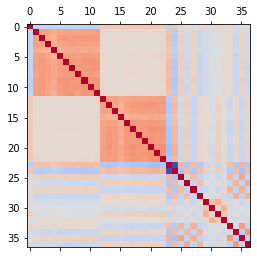

In [406]:
plt.figure(figsize=(10,8))

plt.matshow(final_df[['score', 'home_player_1_rate',
       'home_player_2_rate', 'home_player_3_rate', 'home_player_4_rate',
       'home_player_5_rate', 'home_player_6_rate', 'home_player_7_rate',
       'home_player_8_rate', 'home_player_9_rate', 'home_player_10_rate',
       'home_player_11_rate', 'away_player_1_rate', 'away_player_2_rate',
       'away_player_3_rate', 'away_player_4_rate', 'away_player_5_rate',
       'away_player_6_rate', 'away_player_7_rate', 'away_player_8_rate',
       'away_player_9_rate', 'away_player_10_rate', 'away_player_11_rate', 'home_poss', 'away_poss', 'home_shoton',
        'away_shoton', 'home_shotoff', 'away_shotoff', 'home_foulcommit',
        'away_foulcommit', 'home_card', 'away_card', 'home_cross', 'away_cross',
        'home_corner', 'away_corner']].corr(), cmap='coolwarm')
plt.show()

In [367]:
final_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10,9,16,11,3,0,24,9,6,6
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,3,5,13,12,0,2,15,19,1,8
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,7,15,14,13,2,1,15,27,6,10
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,7,8,11,11,2,2,14,21,3,4
1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,...,5,5,11,11,1,2,25,27,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,5,4,26,10,4,4,13,9,9,2
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,3,5,11,10,0,1,20,14,3,5
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,12,5,8,15,1,3,20,20,9,3
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,6,0,8,11,3,3,17,6,3,3


## Data Modeling

### Baseline model

In [411]:
from sklearn.model_selection import train_test_split

In [513]:
X = final_df[['home_player_1_rate','home_player_2_rate', 'home_player_3_rate', 'home_player_4_rate',
              'home_player_5_rate', 'home_player_6_rate', 'home_player_7_rate', 'home_player_8_rate',
              'home_player_9_rate', 'home_player_10_rate','home_player_11_rate', 'home_poss',
              'home_shoton', 'home_shotoff', 'home_foulcommit', 'home_card', 'home_cross',
              'away_player_1_rate', 'away_player_2_rate', 'away_player_3_rate', 'away_player_4_rate',
              'away_player_5_rate', 'away_player_6_rate', 'away_player_7_rate', 'away_player_8_rate',
              'away_player_9_rate', 'away_player_10_rate', 'away_player_11_rate','away_poss', 'away_shoton',
              'away_shotoff', 'away_foulcommit', 'away_card', 'away_corner']]

y = final_df['score']

In [514]:
X.head()

,home_player_1_rate,home_player_2_rate,home_player_3_rate,home_player_4_rate,home_player_5_rate,home_player_6_rate,home_player_7_rate,home_player_8_rate,home_player_9_rate,home_player_10_rate,...,away_player_8_rate,away_player_9_rate,away_player_10_rate,away_player_11_rate,away_poss,away_shoton,away_shotoff,away_foulcommit,away_card,away_corner
1728,83,73,75,81,81,75,80,80,78,71,...,71,74,71,79,45.25,1,9,11,0,6
1730,74,61,64,63,72,69,68,70,73,66,...,64,76,80,79,54.50,11,5,12,2,8
1731,76,76,71,70,70,71,77,75,75,70,...,65,66,71,66,50.25,7,15,13,1,10
1733,79,74,74,74,71,78,75,81,82,75,...,68,68,68,74,48.25,8,8,11,2,4
1734,70,71,68,78,67,76,67,70,74,78,...,87,73,79,73,49.00,2,5,11,2,9


In [515]:
from tensorflow.keras.utils import to_categorical

# YOUR CODE HERE
print(y)
y_cat = to_categorical(y, dtype='int64')
print(y_cat)


1728     1
1730     2
1731     0
1733     2
1734     0
        ..
24552    0
24553    0
24554    0
24555    1
24556    0
Name: score, Length: 7649, dtype: int64
[[0 1 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [516]:
from sklearn.preprocessing import RobustScaler

# Instanciate Robust Scaler
r_scaler = RobustScaler()

# Fit scaler to feature
r_scaler.fit(X)

# Scale
X = r_scaler.transform(X)

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [519]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5354, 34), (5354, 3), (2295, 34), (2295, 3))

## Supervised Machine Learning  : KNN Classifier

In [520]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=40) ## ==> K = 10 neighbors
kneigh.fit(X_train, y_train)  ## => Require X_train, y_train from Hold Out method
kneigh.score(X_test,y_test)  ## => Require X_test, y_test from Hold Out method

0.3172113289760349

In [521]:
# kneigh.predict(new_X) ## => new_X : vector of feature to predict

Example :

h_poss | a_poss | h_shoton | a_shoton | h_shotoff | a_shotoff | h_foulcommit | a_foulcommit | h_card | a_card | h_cross | a_cross | h_corner | a_corner
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
0.55 | 0.45 | 7 | 2 | 14 | 9 | 16 | 11 | 3 | 3 | 10 | 8 | 6 | 6

In [522]:
kneigh.predict(r_scaler.transform([[0.55,0.45,7,2,14,9,16,11,3,3,10,8,6,6]]))

ValueError: X has 14 features, but RobustScaler is expecting 34 features as input.

## Deep Learning Approach (ANN MultiClass)

In [523]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [524]:
y.value_counts(), np.unique(y)

(0    3507
 2    2202
 1    1940
 Name: score, dtype: int64,
 array([0, 1, 2]))

In [525]:
from tensorflow.keras.utils import to_categorical

# YOUR CODE HERE
print(y)
y_cat = to_categorical(y, dtype='int64')
print(y_cat)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

1728     1
1730     2
1731     0
1733     2
1734     0
        ..
24552    0
24553    0
24554    0
24555    1
24556    0
Name: score, Length: 7649, dtype: int64
[[0 1 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [526]:
#Init model

from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.Dense(5, activation='relu', input_dim=34)) # put the dimensions of X.shape for x1,x2,x3 
model.add(layers.Dense(2, activation='relu')) # ReLU activation is the prefered default activation fonction
model.add(layers.Dense(3, activation='softmax')) # Number of neurones correspond to the number of categorical values to classify

In [527]:
#Compile model
model.compile(loss='categorical_crossentropy',   # The loss is calculated with the categorical_crossentropy parameter
              optimizer='adam',
              metrics=['accuracy'])

In [528]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5354, 34), (2295, 34), (5354, 3), (2295, 3))

In [529]:
#Fit model
from tensorflow.keras.callbacks import EarlyStopping                  ## import EarlyStopping if wanted to stop before all the epochs iterations.
es = EarlyStopping(patience=5, restore_best_weights=True, verbose=1)  ## define the number of patience (retries before stopping the iteration epohcs) 


model.fit(X_train,                ## doing the fit on the train data
          y_train,                ## doing the fit on the train data
          validation_split=0.3,   ## Validation set (here split the 20% of the train data)
          epochs=500,             ## Number of epochs to iterate (the EarlyStopping should stop before arriving at the end if find optimum acu)
          batch_size=16,          ## Number of batch size. Slice the data to adjust weights
          callbacks = [es])       ## Calling EarlyStopping

Epoch 1/500
235/235 [==============================] - 1s 3ms/step - loss: 1.1336 - accuracy: 0.3417 - val_loss: 1.0536 - val_accuracy: 0.4536
Epoch 2/500
235/235 [==============================] - 1s 3ms/step - loss: 1.0421 - accuracy: 0.4469 - val_loss: 1.0090 - val_accuracy: 0.4704
Epoch 3/500
235/235 [==============================] - 1s 3ms/step - loss: 1.0115 - accuracy: 0.4849 - val_loss: 0.9781 - val_accuracy: 0.5345
Epoch 4/500
235/235 [==============================] - 1s 2ms/step - loss: 0.9659 - accuracy: 0.5429 - val_loss: 0.9581 - val_accuracy: 0.5451
Epoch 5/500
235/235 [==============================] - 1s 3ms/step - loss: 0.9464 - accuracy: 0.5586 - val_loss: 0.9485 - val_accuracy: 0.5501
Epoch 6/500
235/235 [==============================] - 1s 2ms/step - loss: 0.9547 - accuracy: 0.5432 - val_loss: 0.9408 - val_accuracy: 0.5594
Epoch 7/500
235/235 [==============================] - 1s 3ms/step - loss: 0.9455 - accuracy: 0.5496 - val_loss: 0.9372 - val_accuracy: 0.5613

In [530]:
#Evaluate the model
model.evaluate(X_test, y_test, verbose=1)  ## Evaluate the model with the test set

72/72 [==============================] - 0s 1ms/step - loss: 0.9351 - accuracy: 0.5634


[0.9350786805152893, 0.5633987188339233]

In [540]:
def transfo_predict(s):
    return s.replace(" | ", ",")

Example: **Braga - Maritimo (2021/01/07) Half-Time**

h_poss | a_poss | h_shoton | a_shoton | h_shotoff | a_shotoff | h_foulcommit | a_foulcommit | h_card | a_card | h_cross | a_cross | h_corner | a_corner
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
0.57 | 0.43 | 1 | 1 | 5 | 3 | 10 | 4 | 1 | 1 | 2 | 2 | 3 | 2

In [389]:
model.predict(r_scaler.transform([[0.57,0.43,1,1,5,3,10,4,1,1,2,2,3,2]]))

array([[0.4632438 , 0.26265624, 0.27409998]], dtype=float32)

Example : **Saint-Etienne - PSG (2021/01/06) Full Time**

Type | Team | GK | B | B | B | B | M | M | M | M | A | A | POSS | SHOT ON | SHOT OFF | FOULS | CARDS | CORNERS
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Home | Saint-Etienne | 71 | 78 | 70 | 74 | 74 | 72 | 63 | 71 | 72 | 76 | 77 | 0.32 | 5 | 5 | 13 | 1 | 9
Away | PSG | 88 | 75 | 77 | 85 | 71 | 83 | 86 | 79 | 87 | 75 | 90 | 0.68 | 4 | 6 | 12 | 1 | 10


In [546]:
transfo_predict("71 | 78 | 70 | 74 | 74 | 72 | 63 | 71 | 72 | 76 | 77 | 0.32 | 5 | 5 | 13 | 1 | 9 | 88 | 75 | 77 | 85 | 71 | 83 | 86 | 79 | 87 | 75 | 90 | 0.68 | 4 | 6 | 12 | 1 | 10")

'71,78,70,74,74,72,63,71,72,76,77,0.32,5,5,13,1,9,88,75,77,85,71,83,86,79,87,75,90,0.68,4,6,12,1,10'

In [545]:
model.predict(r_scaler.transform([[71,78,70,74,74,72,63,71,72,76,77,0.32,5,5,13,1,9,88,75,77,85,71,83,86,79,87,75,90,0.68,4,6,12,1,10]]))

array([[0.19539276, 0.299975  , 0.50463223]], dtype=float32)

Example : **Southampton - Liverpool (2021/01/04) Full Time**

h_poss | a_poss | h_shoton | a_shoton | h_shotoff | a_shotoff | h_foulcommit | a_foulcommit | h_card | a_card | h_cross | a_cross | h_corner | a_corner
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
0.33 | 0.67 | 3 | 1 | 3 | 11 | 5 | 12 | 1 | 3 | 4 | 8 | 1 | 10

In [391]:
model.predict(r_scaler.transform([[0.33,0.67,3,1,3,11,5,12,1,3,4,8,1,10]]))

array([[0.32516187, 0.28483826, 0.38999993]], dtype=float32)

Example : **Chelsea - Man City (2021/01/03) Full Time**

h_poss | a_poss | h_shoton | a_shoton | h_shotoff | a_shotoff | h_foulcommit | a_foulcommit | h_card | a_card | h_cross | a_cross | h_corner | a_corner
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
0.55 | 0.45 | 2 | 6 | 2 | 8 | 11 | 10 | 3 | 1 | 4 | 8 | 5 | 3

In [392]:
model.predict(r_scaler.transform([[0.55,0.45,2,6,2,8,11,10,3,1,4,8,5,3]]))

array([[0.41649452, 0.2725154 , 0.31099012]], dtype=float32)

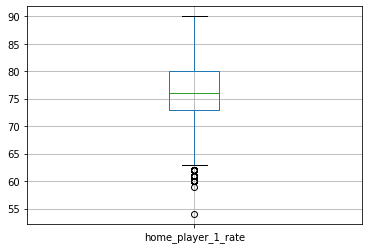

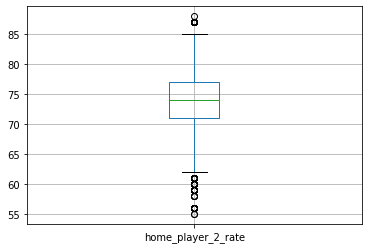

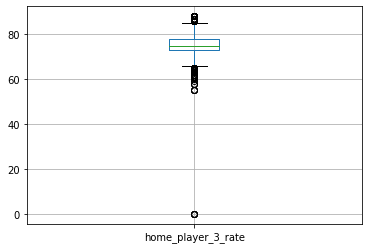

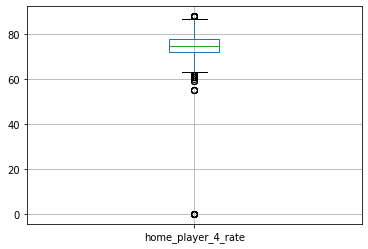

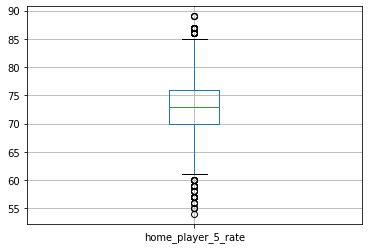

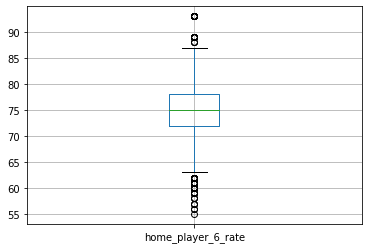

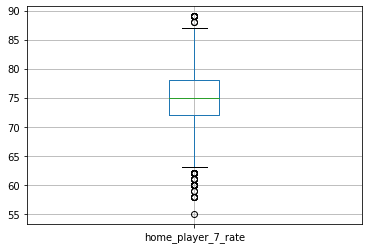

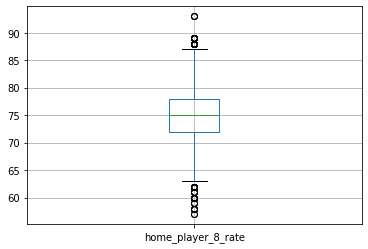

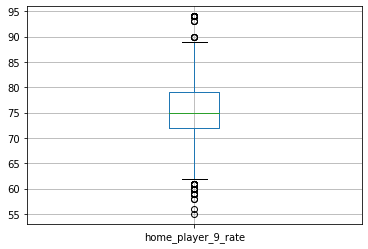

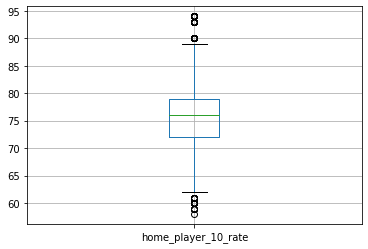

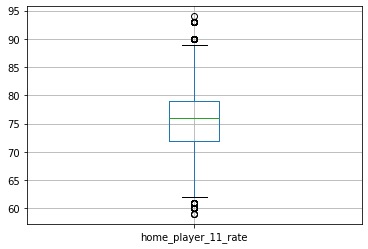

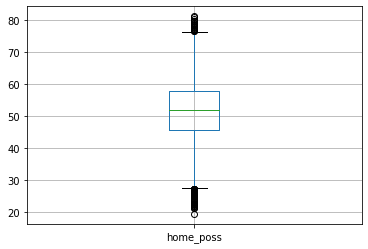

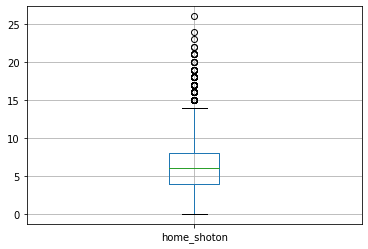

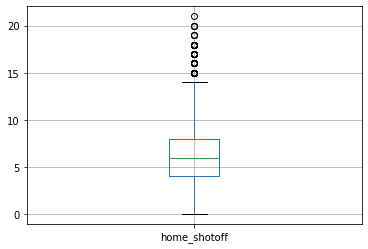

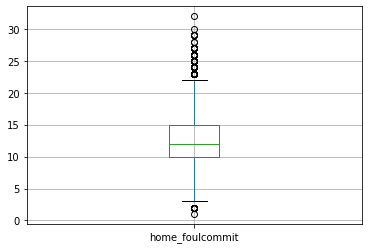

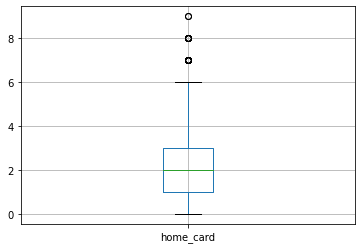

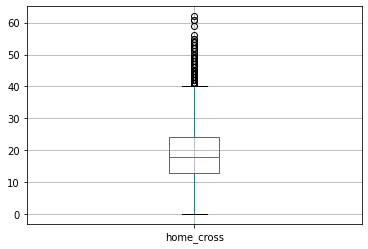

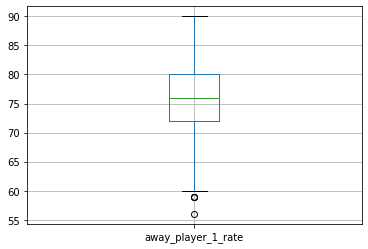

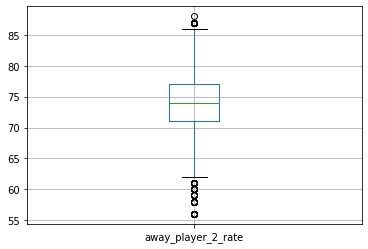

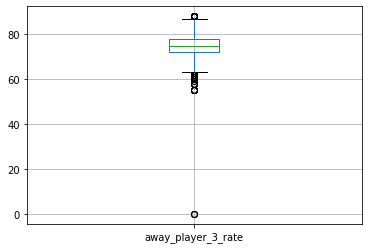

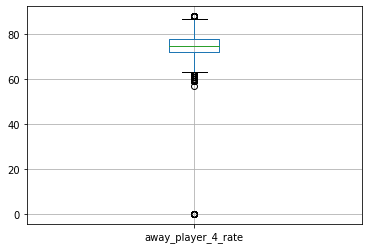

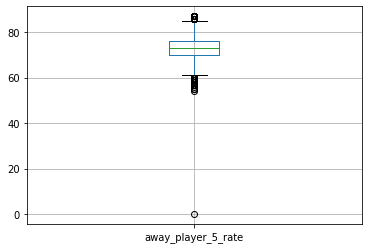

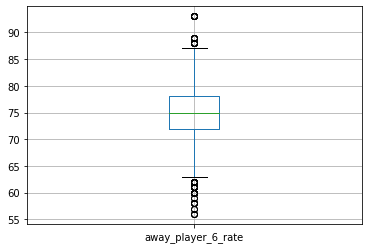

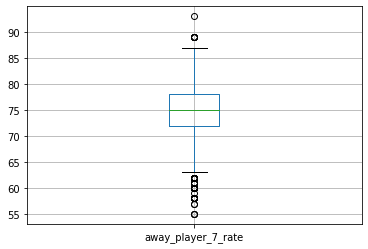

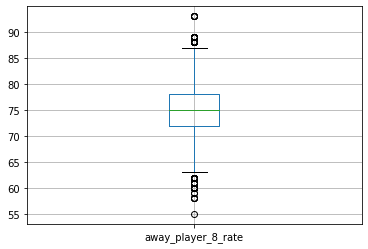

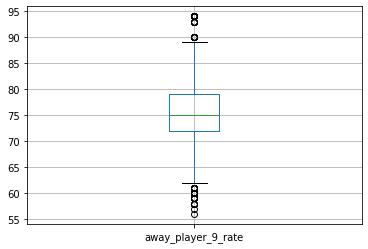

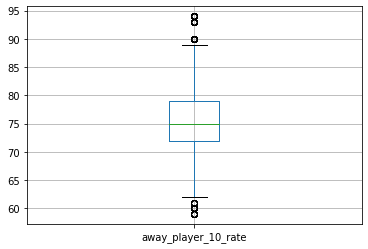

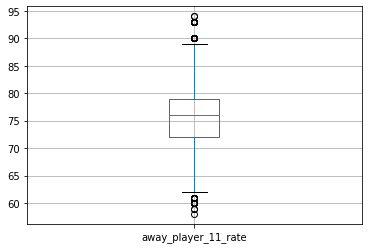

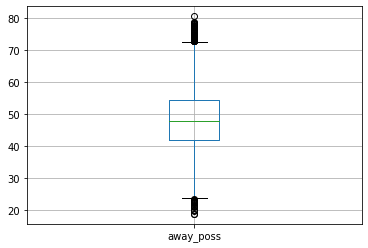

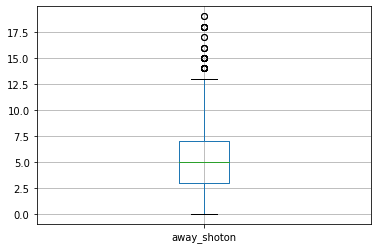

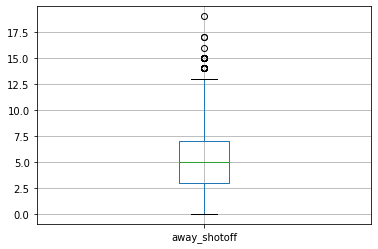

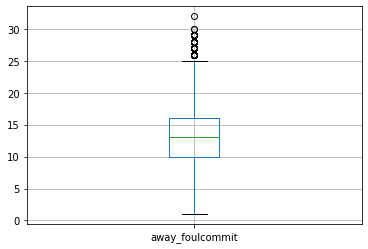

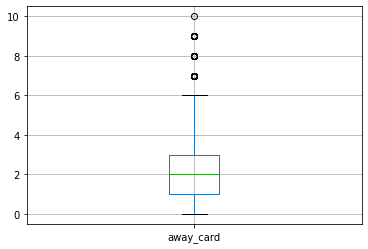

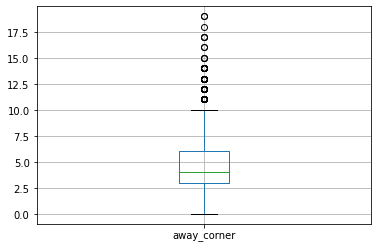

In [531]:
features = ['home_player_1_rate','home_player_2_rate', 'home_player_3_rate', 'home_player_4_rate',
              'home_player_5_rate', 'home_player_6_rate', 'home_player_7_rate', 'home_player_8_rate',
              'home_player_9_rate', 'home_player_10_rate','home_player_11_rate', 'home_poss',
              'home_shoton', 'home_shotoff', 'home_foulcommit', 'home_card', 'home_cross',
              'away_player_1_rate', 'away_player_2_rate', 'away_player_3_rate', 'away_player_4_rate',
              'away_player_5_rate', 'away_player_6_rate', 'away_player_7_rate', 'away_player_8_rate',
              'away_player_9_rate', 'away_player_10_rate', 'away_player_11_rate','away_poss', 'away_shoton',
              'away_shotoff', 'away_foulcommit', 'away_card', 'away_corner']

target = 'score'

for feature in features:
    final_df[[feature]].boxplot()
    plt.show()

In [533]:
X = final_df[['home_player_1_rate','home_player_2_rate', 'home_player_3_rate', 'home_player_4_rate',
              'home_player_5_rate', 'home_player_6_rate', 'home_player_7_rate', 'home_player_8_rate',
              'home_player_9_rate', 'home_player_10_rate','home_player_11_rate', 'home_poss',
              'home_shoton', 'home_shotoff', 'home_foulcommit', 'home_card', 'home_cross',
              'away_player_1_rate', 'away_player_2_rate', 'away_player_3_rate', 'away_player_4_rate',
              'away_player_5_rate', 'away_player_6_rate', 'away_player_7_rate', 'away_player_8_rate',
              'away_player_9_rate', 'away_player_10_rate', 'away_player_11_rate','away_poss', 'away_shoton',
              'away_shotoff', 'away_foulcommit', 'away_card', 'away_corner']]


In [534]:
from sklearn.preprocessing import MinMaxScaler

# Instanciate Robust Scaler
mm_scaler = MinMaxScaler()

# Fit scaler to feature
mm_scaler.fit(X)

# Scale
X = mm_scaler.transform(X)

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [536]:
#Init model

from tensorflow.keras import Sequential, layers

model2 = Sequential()
model2.add(layers.Dense(5, activation='relu', input_dim=34)) # put the dimensions of X.shape for x1,x2,x3 
model2.add(layers.Dense(2, activation='relu')) # ReLU activation is the prefered default activation fonction
model2.add(layers.Dense(3, activation='softmax')) # Number of neurones correspond to the number of categorical values to classify

In [537]:
#Compile model
model2.compile(loss='categorical_crossentropy',   # The loss is calculated with the categorical_crossentropy parameter
              optimizer='adam',
              metrics=['accuracy'])

In [538]:
#Fit model
from tensorflow.keras.callbacks import EarlyStopping                  ## import EarlyStopping if wanted to stop before all the epochs iterations.
es = EarlyStopping(patience=10, restore_best_weights=True, verbose=1)  ## define the number of patience (retries before stopping the iteration epohcs) 



model2.fit(X_train,                ## doing the fit on the train data
          y_train,                ## doing the fit on the train data
          validation_split=0.3,   ## Validation set (here split the 30% of the train data)
          epochs=500,             ## Number of epochs to iterate (the EarlyStopping should stop before arriving at the end if find optimum acu)
          batch_size=16,          ## Number of batch size. Slice the data to adjust weights
          callbacks = [es])       ## Calling EarlyStopping
          
       


Epoch 1/500
235/235 [==============================] - 1s 3ms/step - loss: 1.0882 - accuracy: 0.4474 - val_loss: 1.0680 - val_accuracy: 0.4617
Epoch 2/500
235/235 [==============================] - 1s 2ms/step - loss: 1.0643 - accuracy: 0.4373 - val_loss: 1.0340 - val_accuracy: 0.4804
Epoch 3/500
235/235 [==============================] - 1s 2ms/step - loss: 1.0400 - accuracy: 0.4801 - val_loss: 1.0137 - val_accuracy: 0.5047
Epoch 4/500
235/235 [==============================] - 1s 3ms/step - loss: 1.0234 - accuracy: 0.5027 - val_loss: 0.9983 - val_accuracy: 0.5152
Epoch 5/500
235/235 [==============================] - 1s 4ms/step - loss: 0.9896 - accuracy: 0.5369 - val_loss: 0.9780 - val_accuracy: 0.5308
Epoch 6/500
235/235 [==============================] - 1s 4ms/step - loss: 0.9887 - accuracy: 0.5226 - val_loss: 0.9785 - val_accuracy: 0.5277
Epoch 7/500
235/235 [==============================] - 1s 5ms/step - loss: 0.9605 - accuracy: 0.5477 - val_loss: 0.9554 - val_accuracy: 0.5420

In [539]:
#Evaluate the model
model2.evaluate(X_test, y_test, verbose=1)  ## Evaluate the model with the test set


72/72 [==============================] - 0s 1ms/step - loss: 0.9262 - accuracy: 0.5647


[0.9262117743492126, 0.5647059082984924]

In [495]:
model2.predict(mm_scaler.transform([[0.57,0.43,1,1,5,3,10,4,1,1,2,2,3,2]]))

ValueError: X has 14 features, but MinMaxScaler is expecting 36 features as input.

In [ ]:
model2.predict(mm_scaler.transform([[0.32,0.68,5,5,5,4,13,12,1,1,8,12,9,10]]))

In [548]:
final_df[['score','home_player_1_rate','home_player_2_rate', 'home_player_3_rate', 'home_player_4_rate',
              'home_player_5_rate', 'home_player_6_rate', 'home_player_7_rate', 'home_player_8_rate',
              'home_player_9_rate', 'home_player_10_rate','home_player_11_rate',
              'away_player_1_rate', 'away_player_2_rate', 'away_player_3_rate', 'away_player_4_rate',
              'away_player_5_rate', 'away_player_6_rate', 'away_player_7_rate', 'away_player_8_rate',
              'away_player_9_rate', 'away_player_10_rate', 'away_player_11_rate']].corr()

,score,home_player_1_rate,home_player_2_rate,home_player_3_rate,home_player_4_rate,home_player_5_rate,home_player_6_rate,home_player_7_rate,home_player_8_rate,home_player_9_rate,...,away_player_2_rate,away_player_3_rate,away_player_4_rate,away_player_5_rate,away_player_6_rate,away_player_7_rate,away_player_8_rate,away_player_9_rate,away_player_10_rate,away_player_11_rate
score,1.000000,-0.194658,-0.193803,-0.188257,-0.169425,-0.177536,-0.199068,-0.200844,-0.194496,-0.216506,...,0.199091,0.195191,0.178967,0.193576,0.195601,0.211512,0.204701,0.218213,0.214427,0.205699
home_player_1_rate,-0.194658,1.000000,0.454662,0.447861,0.398595,0.451822,0.446030,0.445551,0.435625,0.456646,...,0.042781,0.063035,0.052964,0.066674,0.075040,0.067277,0.060914,0.065764,0.066208,0.078138
home_player_2_rate,-0.193803,0.454662,1.000000,0.425780,0.379037,0.476842,0.501374,0.476066,0.485898,0.498477,...,0.054322,0.057307,0.072314,0.076608,0.073790,0.062441,0.065639,0.054521,0.077402,0.078270
home_player_3_rate,-0.188257,0.447861,0.425780,1.000000,0.363739,0.432365,0.449929,0.474767,0.462761,0.453487,...,0.040391,0.059111,0.043499,0.050495,0.054376,0.045310,0.057072,0.047386,0.050622,0.066950
home_player_4_rate,-0.169425,0.398595,0.379037,0.363739,1.000000,0.356954,0.415591,0.409403,0.406705,0.400549,...,0.058411,0.061477,0.050999,0.063260,0.070670,0.066319,0.067817,0.066264,0.060282,0.071779
home_player_5_rate,-0.177536,0.451822,0.476842,0.432365,0.356954,1.000000,0.489962,0.474684,0.461936,0.499118,...,0.070279,0.074262,0.054174,0.074837,0.086840,0.076679,0.080820,0.072216,0.078149,0.098105
home_player_6_rate,-0.199068,0.446030,0.501374,0.449929,0.415591,0.489962,1.000000,0.499492,0.470348,0.508196,...,0.054306,0.070341,0.069860,0.078658,0.079344,0.074387,0.065901,0.061061,0.054261,0.077167
home_player_7_rate,-0.200844,0.445551,0.476066,0.474767,0.409403,0.474684,0.499492,1.000000,0.485548,0.504707,...,0.057244,0.057659,0.043839,0.079769,0.078330,0.071902,0.055834,0.058743,0.061430,0.070409
home_player_8_rate,-0.194496,0.435625,0.485898,0.462761,0.406705,0.461936,0.470348,0.485548,1.000000,0.482686,...,0.057628,0.077060,0.055679,0.079534,0.095710,0.077694,0.070826,0.066541,0.065132,0.093120
home_player_9_rate,-0.216506,0.456646,0.498477,0.453487,0.400549,0.499118,0.508196,0.504707,0.482686,1.000000,...,0.057051,0.069876,0.061084,0.060963,0.074020,0.056156,0.074189,0.058564,0.073842,0.081785


## Modelling with only the rating of the 22 initial players

In [585]:
X = final_df[['home_player_1_rate','home_player_2_rate', 'home_player_3_rate', 'home_player_4_rate',
              'home_player_5_rate', 'home_player_6_rate', 'home_player_7_rate', 'home_player_8_rate',
              'home_player_9_rate', 'home_player_10_rate','home_player_11_rate',
              'away_player_1_rate', 'away_player_2_rate', 'away_player_3_rate', 'away_player_4_rate',
              'away_player_5_rate', 'away_player_6_rate', 'away_player_7_rate', 'away_player_8_rate',
              'away_player_9_rate', 'away_player_10_rate', 'away_player_11_rate']]

In [586]:
y = final_df['score']
y.value_counts()

0    3507
2    2202
1    1940
Name: score, dtype: int64

In [587]:
from sklearn.preprocessing import RobustScaler

# Instanciate Robust Scaler
r_scaler = RobustScaler()

# Fit scaler to feature
r_scaler.fit(X)

# Scale
X = r_scaler.transform(X)

In [588]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y, dtype='int64')
print(y_cat)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

[[0 1 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [1 0 0]]


((5354, 22), (5354, 3), (2295, 22), (2295, 3))

In [589]:
#Init model

from tensorflow.keras import Sequential, layers

model3 = Sequential()
model3.add(layers.Dense(4, activation='relu', input_dim=22)) # put the dimensions of X.shape for x1,x2,x3 
model3.add(layers.Dense(5, activation='relu')) # ReLU activation is the prefered default activation fonction
model3.add(layers.Dense(3, activation='softmax')) # Number of neurones correspond to the number of categorical values to classify


In [590]:
#Compile model
model3.compile(loss='categorical_crossentropy',   # The loss is calculated with the categorical_crossentropy parameter
              optimizer='adam',
              metrics=['accuracy'])

In [591]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5354, 22), (2295, 22), (5354, 3), (2295, 3))

In [592]:
#Fit model
from tensorflow.keras.callbacks import EarlyStopping                  ## import EarlyStopping if wanted to stop before all the epochs iterations.
es = EarlyStopping(patience=10, restore_best_weights=True, verbose=1)  ## define the number of patience (retries before stopping the iteration epohcs) 


model3.fit(X_train,                ## doing the fit on the train data
          y_train,                ## doing the fit on the train data
          validation_split=0.3,   ## Validation set (here split the 20% of the train data)
          epochs=500,             ## Number of epochs to iterate (the EarlyStopping should stop before arriving at the end if find optimum acu)
          batch_size=16,          ## Number of batch size. Slice the data to adjust weights
          callbacks = [es])       ## Calling EarlyStopping
   

Epoch 1/500
235/235 [==============================] - 1s 2ms/step - loss: 1.2113 - accuracy: 0.3499 - val_loss: 1.0506 - val_accuracy: 0.4505
Epoch 2/500
235/235 [==============================] - 0s 2ms/step - loss: 1.0450 - accuracy: 0.4619 - val_loss: 1.0167 - val_accuracy: 0.4841
Epoch 3/500
235/235 [==============================] - 0s 2ms/step - loss: 1.0213 - accuracy: 0.4719 - val_loss: 1.0011 - val_accuracy: 0.5221
Epoch 4/500
235/235 [==============================] - 0s 2ms/step - loss: 0.9990 - accuracy: 0.5144 - val_loss: 0.9866 - val_accuracy: 0.5395
Epoch 5/500
235/235 [==============================] - 0s 2ms/step - loss: 1.0007 - accuracy: 0.5162 - val_loss: 0.9767 - val_accuracy: 0.5389
Epoch 6/500
235/235 [==============================] - 0s 2ms/step - loss: 0.9945 - accuracy: 0.5174 - val_loss: 0.9702 - val_accuracy: 0.5414
Epoch 7/500
235/235 [==============================] - 0s 2ms/step - loss: 0.9853 - accuracy: 0.5201 - val_loss: 0.9664 - val_accuracy: 0.5401

In [593]:
#Evaluate the model
model3.evaluate(X_test, y_test, verbose=1)  ## Evaluate the model with the test set

72/72 [==============================] - 0s 1ms/step - loss: 0.9652 - accuracy: 0.5338


[0.9652303457260132, 0.5337690711021423]

---

Example : **Saint-Etienne - PSG (2021/01/06) Full Time : 1 - 1**

Type | Team | GK | B | B | B | B | M | M | M | M | A | A | POSS | SHOT ON | SHOT OFF | FOULS | CARDS | CORNERS
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Home | Saint-Etienne | 71 | 78 | 70 | 74 | 74 | 72 | 63 | 71 | 72 | 76 | 77 | 0.32 | 5 | 5 | 13 | 1 | 9
Away | PSG | 88 | 75 | 77 | 85 | 71 | 83 | 86 | 79 | 87 | 75 | 90 | 0.68 | 4 | 6 | 12 | 1 | 10

In [601]:
def reverse_transfo_predict(s):
    return s.replace(", ", " | ")

In [597]:
model3.predict(r_scaler.transform([[71,78,70,74,74,72,63,71,72,76,77,88,75,77,85,83,83,86,79,87,91,90]]))

array([[0.11084382, 0.22645138, 0.6627047 ]], dtype=float32)

---

Example : **Lorient - Monaco (2021/01/06) Full Time : 2 - 5**

Type | Team | GK | B | B | B | B | M | M | M | M | A | A
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
Home | Lorient | 74 |  68 |  67 |  74 |  73 |  70 |  72 |  65 |  69 |  72 |  69
Away | Monaco | 70 |  79 |  76 |  74 |  77 |  65 |  75 |  74 |  79 |  84 |  81

In [599]:
reverse_transfo_predict("74, 68, 67, 74, 73, 70, 72, 65, 69, 72, 69, 70, 79, 76, 74, 77, 65, 75, 74, 79, 84, 81")

'74 |  68 |  67 |  74 |  73 |  70 |  72 |  65 |  69 |  72 |  69 |  70 |  79 |  76 |  74 |  77 |  65 |  75 |  74 |  79 |  84 |  81'

In [600]:
model3.predict(r_scaler.transform([[74, 68, 67, 74, 73, 70, 72, 65, 69, 72, 69, 70, 79, 76, 74, 77, 65, 75, 74, 79, 84, 81]]))

array([[0.22809775, 0.29603016, 0.47587207]], dtype=float32)

--------

Example : **Chelsea - Man City** (2021/01/03) Full Time : **1 \- 3**

Type | Team | GK | B | B | B | B | M | M | M | M | A | A
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
Home | Chelsea | 80 | 83 | 81 | 85 | 81 | 83 | 88 | 80 | 85 | 85 | 81
Away | Man City | 76 | 83 | 80 | 82 | 79 | 86 | 85 | 83 | 88 | 91 | 79

In [604]:
reverse_transfo_predict("80, 83, 81, 85, 81, 83, 88, 80, 85, 85, 81, 76, 83, 80, 82, 79, 86, 85, 83, 88, 91, 79 ")

'80 | 83 | 81 | 85 | 81 | 83 | 88 | 80 | 85 | 85 | 81 | 76 | 83 | 80 | 82 | 79 | 86 | 85 | 83 | 88 | 91 | 79 '

In [633]:
che_mci = model3.predict(r_scaler.transform([[80, 83, 81, 85, 81, 83, 88, 80, 85, 85, 81, 76, 83, 80, 82, 79, 86, 85, 83, 88, 91, 79]]))
che_mci

array([[0.45161375, 0.3125987 , 0.2357875 ]], dtype=float32)

In [634]:
1/che_mci[0,0], 1/che_mci[0,1], 1/che_mci[0,2]

(2.214281542728702, 3.1989895769616226, 4.241107001382949)

---

Example : **Brighton - Wolves** (2021/01/02) Full Time : **3 - 3**

Type | Team | GK | B | B | B | B | M | M | M | M | A | A
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
Home | Brighton | 64 | 75 | 78 | 75 | 77 | 76 | 75 | 75 | 77 | 78 | 70
Away | Wolves | 84 | 83 | 79 | 79 | 73 | 82 | 82 | 79 | 66 | 76 | 69

In [608]:
reverse_transfo_predict("64, 75, 78, 75, 77, 76, 75, 75, 77, 78, 70, 84, 83, 79, 79, 73, 82, 82, 79, 66, 76, 69")

'64 | 75 | 78 | 75 | 77 | 76 | 75 | 75 | 77 | 78 | 70 | 84 | 83 | 79 | 79 | 73 | 82 | 82 | 79 | 66 | 76 | 69'

In [610]:
brh_wol = model3.predict(r_scaler.transform([[64, 75, 78, 75, 77, 76, 75, 75, 77, 78, 70, 84, 83, 79, 79, 73, 82, 82, 79, 66, 76, 69]]))

In [629]:
brh_wol

array([[0.35029122, 0.2786558 , 0.37105304]], dtype=float32)

In [632]:
1/brh_wol[0][0], 1/brh_wol[0][1], 1/brh_wol[0][2]

(2.8547675084098167, 3.588656722356047, 2.6950324943451953)